In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt #visualizar resultados 
from sklearn import datasets, linear_model #ajustar el modelo 
from sklearn.metrics import mean_squared_error, r2_score #evaluar la precision del modelo 

df=pd.read_csv("base_datos_2008.csv")

In [10]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [12]:
df=df.dropna(subset=["ArrDelay"])

In [13]:
df1=df.sample(frac=1).head(100000)

In [20]:
Y=df1[["ArrDelay"]]#vamos a intentar predecir la variable repuesta es decir el retraso en la llegada

In [21]:
X=df1[["DepDelay"]]#utilizando el retraso en la salida

In [22]:
#estas dos variables estan muy relacionadas vamos a tener un buen modelo predictivo
#ajustamos el modelo con la siguiente instruccion 
regr=linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Coeficientes:",regr.coef_)

Coeficientes: [[1.01757405]]


In [24]:
#encontramos los valores que nos genera el modelo
y_pred=regr.predict(X)

In [25]:
print("R cuadrado",r2_score(Y,y_pred))#cuando es mas proximo a 1 es un modelo mejor y si es mas cerca de 0 menos explicativo

R cuadrado 0.8632061588509774


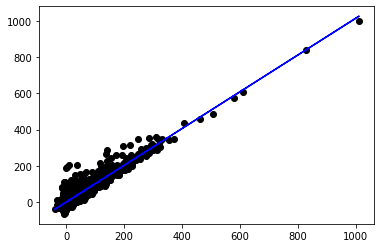

In [27]:
plt.scatter(X[1:10000],Y[1:10000],color="black")
plt.plot(X[1:10000],y_pred[1:10000],color="blue")
plt.show()

In [28]:
#tratar variables categoricas como string y convertirlas en dummies (1 o 0)
X= df1[["AirTime","Distance","TaxiIn","TaxiOut"]] #todas son numericas

df1["Month"]=df1["Month"].apply(str)
df1["DayofMonth"]=df1["DayofMonth"].apply(str)
df1["DayOfWeek"]=df1["DayOfWeek"].apply(str)

In [29]:
df1.dtypes

Year                   int64
Month                 object
DayofMonth            object
DayOfWeek             object
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [30]:
dummies=pd.get_dummies(data=df1[["Month","DayofMonth","DayOfWeek","Origin","Dest"]])

In [31]:
dummies

,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
3607406,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6822640,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3530230,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6020682,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3672633,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789042,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1125455,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5352023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732082,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X=dummies.add(X,fill_value=0)

In [34]:
X.dtypes

AirTime        float64
DayOfWeek_1    float64
DayOfWeek_2    float64
DayOfWeek_3    float64
DayOfWeek_4    float64
                ...   
Origin_YAK     float64
Origin_YKM     float64
Origin_YUM     float64
TaxiIn         float64
TaxiOut        float64
Length: 650, dtype: object

In [35]:
#vamos ajustar el modelo 
#no es optimo solo ofrece un 18 porciento
regr=linear_model.LinearRegression()
regr.fit(X,Y)
y_pred=regr.predict(X)
print("Rcuadrado:",r2_score(Y,y_pred))

Rcuadrado: 0.18438823176596764


In [36]:
#vamos añadir una nueva variable 
X=X.add(df1[["DepDelay"]],fill_value=0)

In [37]:
#vamos ajustar el modelo 
#no es optimo solo ofrece un 18 porciento
regr=linear_model.LinearRegression()
regr.fit(X,Y)
y_pred=regr.predict(X)
print("Rcuadrado:",r2_score(Y,y_pred))

Rcuadrado: 0.97075058376503


In [ ]:
#lo que se deberia hacer es probar el modelo con nuevos datos 